['Othercomputers', 'Shareddrives', '.file-revisions-by-id', 'MyDrive', '.shortcut-targets-by-id', '.Trash-0', '.Encrypted']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Epoch 1/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.4810 - loss: 1.3550 - val_accuracy: 0.7135 - val_loss: 0.7932
Epoch 2/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7217 - loss: 0.7652 - val_accuracy: 0.7083 - val_loss: 0.7903
Epoch 3/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7656 - loss: 0.6395 - val_accuracy: 0.7389 - val_loss: 0.7148
Epoch 4/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7937 - loss: 0.5696 - val_accuracy: 0.7879 - val_loss: 0.5789
Epoch 5/10
2813/2813 ━━━━━━━

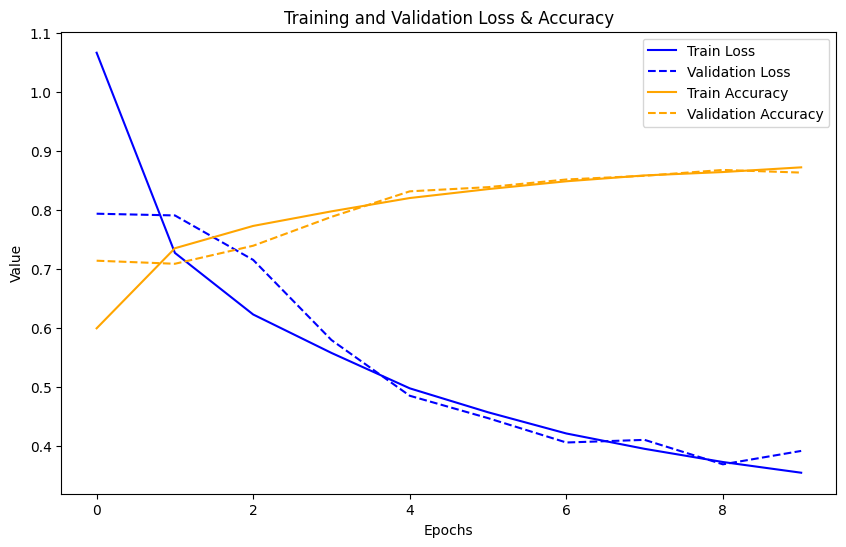


Confusion matrix
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


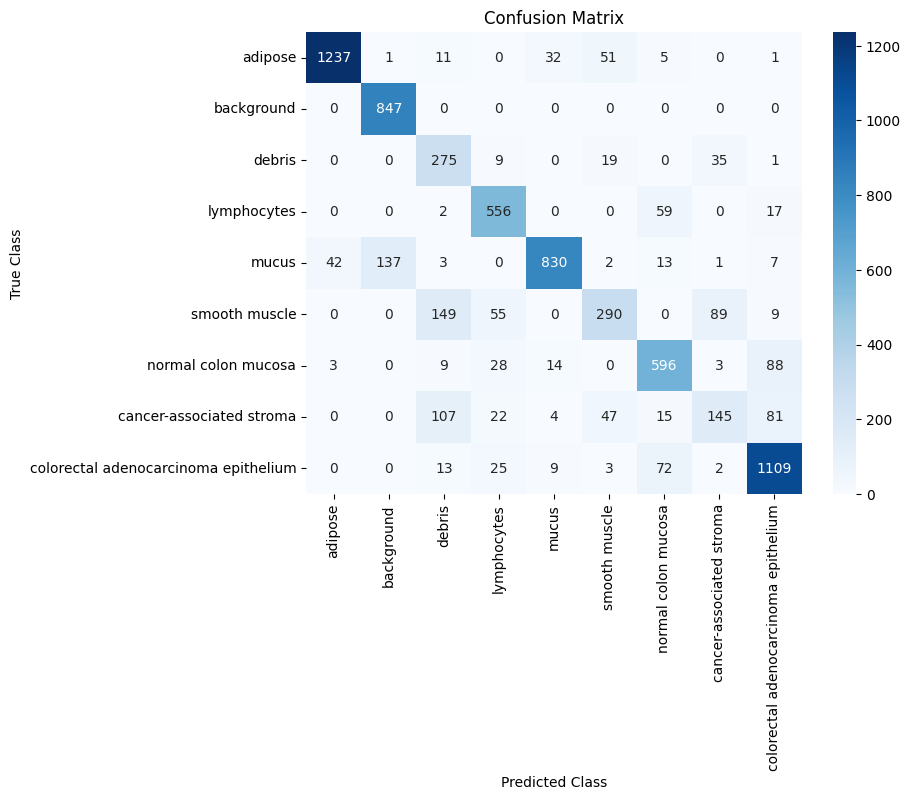

Loaded model summary


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 26, 26, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,483 (880.80 KB)

 Trainable params: 225,481 (880.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [16]:
!pip install medmnist
import cv2
import os
import shutil
import pickle
import numpy as np
import seaborn as sns
import medmnist
from medmnist import INFO
from keras.layers import Input
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from google.colab import drive


print(os.listdir('/content/drive'))
shutil.rmtree('/content/drive', ignore_errors=True)
# drive.flush_and_unmount()
drive.mount('/content/drive')


def resize_and_normalize(images, target_size=(28, 28)):
    resized_images = np.array([cv2.resize(img, target_size) for img in images])
    resized_images = resized_images.astype('float32') / 255.0
    return resized_images


data_flag = 'pathmnist'
info = INFO[data_flag]
task = info['task']
classes = INFO[data_flag]['label']
num_classes = len(classes)
# print(f"Classes: {classes}")
# print(INFO.keys())
# from pprint import pprint
# pprint(INFO['pathmnist'])

DataClass = getattr(medmnist, info['python_class'])
train_dataset = DataClass(split='train', download=True)
test_dataset = DataClass(split='test', download=True)
val_dataset = DataClass(split='val', download=True)
type(train_dataset.imgs[0]), type(train_dataset.labels[0]), train_dataset.imgs[0].shape, train_dataset.labels[0].shape, train_dataset.labels[:5]

train_images = resize_and_normalize(train_dataset.imgs)
test_images = resize_and_normalize(test_dataset.imgs)
val_images = resize_and_normalize(val_dataset.imgs)

train_labels = to_categorical(train_dataset.labels, num_classes=num_classes)
val_labels = to_categorical(val_dataset.labels, num_classes=num_classes)
test_labels = to_categorical(test_dataset.labels, num_classes=num_classes)

model = Sequential([
    Input(shape=(28, 28, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels), verbose=1)
final_loss, final_accuracy = model.evaluate(test_images, test_labels)
# model.summary()
# print(f"Accuracy: {final_accuracy:.4f}, Loss: {final_loss:.4f}")


print("\nLoss and accuracy")
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', linestyle='-', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', color='blue')
plt.plot(history.history['accuracy'], label='Train Accuracy', linestyle='-', color='orange')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', color='orange')
plt.title('Training and Validation Loss & Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


print("\nConfusion matrix")
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)
matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=INFO['pathmnist']['label'].values(), yticklabels=INFO['pathmnist']['label'].values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()



# Save the model in h5 (legacy)
model.save('/content/drive/MyDrive/Colab Notebooks/trained_models/hw4_model.h5')
# Native Keras format
# model.save('/content/drive/MyDrive/Colab Notebooks/trained_models/hw4_model.keras')
# pickle
# pickle.dump(model, open('/content/drive/MyDrive/Colab Notebooks/trained_models/hw4_model.h5', 'wb'))

# Load the model h5, keras or pickle
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/trained_models/hw4_model.h5')
# loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/trained_models/hw4_model.keras')
# loaded model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/trained_models/hw4_model.h5', 'rb'))

print("Loaded model summary")
loaded_model.summary()







